In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Fetch data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Tesla.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [ ]:
data.shape

(1692, 7)

In [ ]:
a = data[['Date','High']]

In [ ]:
a1 = a[['High']].values
a1

array([[ 25.      ],
       [ 30.42    ],
       [ 25.92    ],
       ...,
       [261.      ],
       [265.75    ],
       [265.329987]])

# Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_a1 = ss.fit_transform(a1)

In [ ]:
scaled_a1.shape

(1692, 1)

In [ ]:
import math
len = math.ceil(scaled_a1.shape[0]*0.8)
len

1354

# Split data into training and testing sets

In [ ]:
train = scaled_a1[0:len, :]
test = scaled_a1[len:, :]

In [ ]:
print(train.shape)
print(test.shape)

(1354, 1)
(338, 1)


In [ ]:
x = []
y = []

for i in range(10,len,1):
  x.append(train[i-10:i])
  y.append(train[i])

In [ ]:
x_arr = np.array(x)
y_arr = np.array(y)

print(x_arr.shape)
print(y_arr.shape)

(1344, 10, 1)
(1344, 1)


# Create Neural Network

In [ ]:
from keras.layers import Dense, LSTM
from keras.models import Sequential

nn = Sequential()
nn.add(LSTM(units=100,return_sequences=True,input_shape=(10, 1)))
nn.add(LSTM(units=100))
nn.add(Dense(1))
nn.compile(optimizer="adam",loss="mean_squared_error")
nn.fit(x_arr,y_arr,epochs=150)

Epoch 1/150
42/42 [==============================] - 4s 16ms/step - loss: 0.1233
Epoch 2/150
42/42 [==============================] - 1s 16ms/step - loss: 0.0086
Epoch 3/150
42/42 [==============================] - 1s 17ms/step - loss: 0.0073
Epoch 4/150
42/42 [==============================] - 1s 17ms/step - loss: 0.0069
Epoch 5/150
42/42 [==============================] - 1s 17ms/step - loss: 0.0066
Epoch 6/150
42/42 [==============================] - 1s 17ms/step - loss: 0.0064
Epoch 7/150
42/42 [==============================] - 1s 17ms/step - loss: 0.0068
Epoch 8/150
42/42 [==============================] - 1s 16ms/step - loss: 0.0063
Epoch 9/150
42/42 [==============================] - 1s 16ms/step - loss: 0.0061
Epoch 10/150
42/42 [==============================] - 1s 16ms/step - loss: 0.0056
Epoch 11/150
42/42 [==============================] - 1s 15ms/step - loss: 0.0052
Epoch 12/150
42/42 [==============================] - 1s 16ms/step - loss: 0.0051
Epoch 13/150
42/42 [=====

# Test data

In [ ]:
test.shape

(338, 1)

In [ ]:
x1 = []
y1 = []

for i in range(10,338,1):
  x1.append(test[i-10:i])
  y1.append(test[i])

In [ ]:
x1_arr = np.array(x1)
y1_arr = np.array(y1)

print(x1_arr.shape)
print(y1_arr.shape)

(328, 10, 1)
(328, 1)


In [ ]:
scaled_pred = nn.predict(x1_arr)
pred = ss.inverse_transform(scaled_pred)
pred

array([[233.27711],
       [233.1706 ],
       [235.64807],
       [239.17403],
       [239.2754 ],
       [238.0498 ],
       [233.63191],
       [237.02863],
       [228.89314],
       [228.9551 ],
       [229.75537],
       [226.74289],
       [221.85486],
       [223.93831],
       [237.73808],
       [238.68765],
       [236.48914],
       [236.61234],
       [237.41481],
       [233.94257],
       [232.87334],
       [233.08958],
       [239.48796],
       [245.07327],
       [243.87935],
       [230.61876],
       [227.97621],
       [220.67754],
       [220.11848],
       [222.20898],
       [215.32365],
       [215.59943],
       [214.0366 ],
       [211.42683],
       [206.27129],
       [213.088  ],
       [201.40315],
       [205.95528],
       [207.21011],
       [205.11334],
       [198.93367],
       [194.83105],
       [193.09966],
       [196.09038],
       [202.17676],
       [193.71121],
       [185.18575],
       [177.40865],
       [175.0497 ],
       [157.89099],


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y1, pred)

221.56888112880767

In [ ]:
pred.shape

(328, 1)

In [ ]:
test.shape

(338, 1)

In [ ]:
p = a1[len:,:]
p.shape

(338, 1)

# Plot test data Vs Predicted data

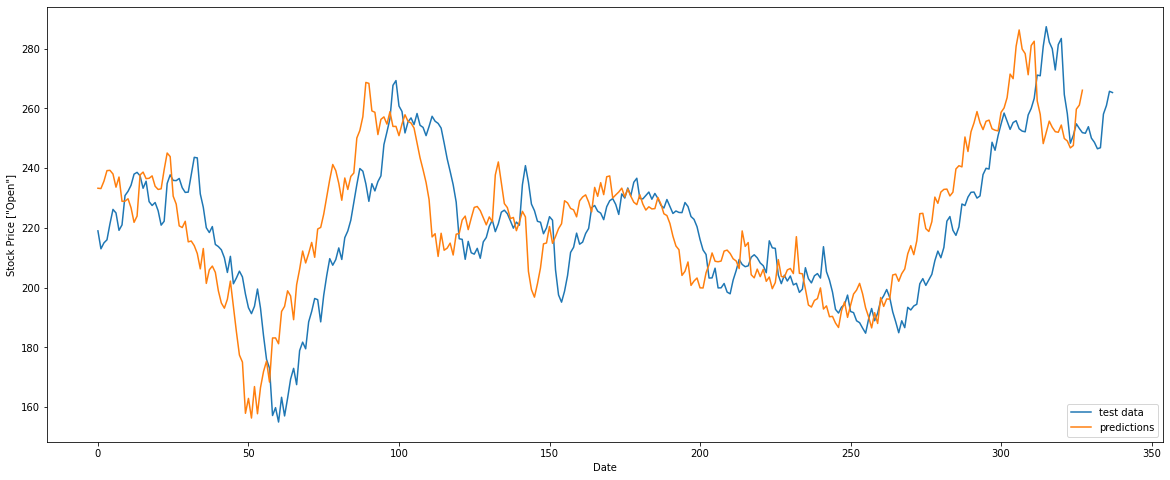

In [ ]:

plt.figure(figsize=(20,8))
plt.plot(p)
plt.plot(pred)
plt.xlabel('Date')
plt.ylabel('Stock Price ["Open"]')
plt.legend(['test data', 'predictions'], loc='lower right')
plt.show()